Langkah 1 - Analisa Descriptive Statistics

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
data_asuransi = pd.read_csv('insurance.csv')

In [4]:
data_asuransi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# 1. Rata-rata umur pengguna
np.mean(data_asuransi['bmi'])

30.66339686098655

In [6]:
# 1. Rata-rata umur pengguna
np.mean(data_asuransi['age'])

39.20702541106129

In [7]:
# 2. Rata-rata nilai charges
np.mean(data_asuransi['charges']).round(2)

13270.42

In [8]:
# 4. Berapa rata-rata nilai BMI dari yang merokok?
smoker = (data_asuransi['smoker'] == 'yes') 
data_smoker = data_asuransi[smoker == True]
data_nonsmoker = data_asuransi[smoker == False]
data_smoker['bmi'].mean().round(2)

30.71

In [9]:
# 5. Apakah variansi dari data charges perokok dan non perokok sama
std_smoker = np.var(data_smoker['charges'])
std_nonsmoker = np.var(data_nonsmoker['charges'])
print(f'Variance dari charge smoker adalah {std_smoker:.2f} dan variance charge non smoker adalah {std_nonsmoker:.2f}')

Variance dari charge smoker adalah 132721153.14 dan variance charge non smoker adalah 35891656.00


In [10]:
# 6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
gender_f_smoker = (data_smoker['sex'] == 'female')
female_smoker = data_smoker[gender_f_smoker == True]
male_smoker = data_smoker[gender_f_smoker == False]

female_smoker_age = female_smoker['age'].mean()
male_smoker_age = male_smoker['age'].mean()

print(f'Rata-rata umur smoker perempuan adalah {female_smoker_age:.2f} dan rata-rata umur smoker laki-laki adalah {male_smoker_age:.2f}')

Rata-rata umur smoker perempuan adalah 38.61 dan rata-rata umur smoker laki-laki adalah 38.45


In [11]:
# 7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
smoker_charges = data_smoker['charges'].mean()
nonsmoker_charges = data_nonsmoker['charges'].mean()

print(f'Rata-rata tagihan smoker adalah {smoker_charges:.2f} dan rata-rata tagihan non-smoker adalah {nonsmoker_charges:.2f}. Sehingga tagihan yang lebih besar adalah tagihan perempuan smoker')

Rata-rata tagihan smoker adalah 32050.23 dan rata-rata tagihan non-smoker adalah 8434.27. Sehingga tagihan yang lebih besar adalah tagihan perempuan smoker


In [12]:
# 8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25
smoker_bmi = (data_smoker['bmi'] >= 25)
heavier_smoker = data_smoker[smoker_bmi == True]
lighter_smoker = data_smoker[smoker_bmi == False]

heavier_smoker_charge = heavier_smoker['charges'].mean()
lighter_smoker_charge = lighter_smoker['charges'].mean()

print(f'Rata-rata tagihan smoker dengan BMI diatas 25 adalah {heavier_smoker_charge:.2f} dan rata-rata tagihan smoker dengan BMI dibawah 25 adalah {lighter_smoker_charge:.2f}')


Rata-rata tagihan smoker dengan BMI diatas 25 adalah 35116.91 dan rata-rata tagihan smoker dengan BMI dibawah 25 adalah 19839.28


In [13]:
# 9. BMI mana yang lebih tinggi, seorang laki-laki atau perempuan?
gender_f_data = (data_asuransi['sex'] == 'female')
female = data_asuransi[gender_f_data == True]
male = data_asuransi[gender_f_data == False]

bmi_female = female['bmi'].mean()
bmi_male = male['bmi'].mean()

print(f'Rata-rata BMI perempuan adalah {bmi_female:.2f} sedangkan rata-rata BMI laki-laki adalah {bmi_male:.2f}. Jadi rata-rata BMI laki-laki lebih besar sedikit dibandingkan dengan rata-rata BMI perempuan')

Rata-rata BMI perempuan adalah 30.38 sedangkan rata-rata BMI laki-laki adalah 30.94. Jadi rata-rata BMI laki-laki lebih besar sedikit dibandingkan dengan rata-rata BMI perempuan


In [14]:
# 10. BMI mana yang lebih tinggi, seorang perokok atau non perokok

mean_data_smoker = data_smoker['bmi'].mean()
mean_data_nonsmoker = data_nonsmoker['bmi'].mean()

print(f'BMI Perokok adalah {mean_data_smoker:.2f} sedangkan BMI non perokok adalah {mean_data_nonsmoker:.2f}, yang nilainya tidak jauh beda')

BMI Perokok adalah 30.71 sedangkan BMI non perokok adalah 30.65, yang nilainya tidak jauh beda


Langkah #2 - Analisa Variabel Kategorik (PMF)

In [15]:
# 1. Gender mana yang memiliki tagihan paling tinggi?
male['charges'].mean().round(2)

13956.75

In [16]:
female['charges'].mean().round(2)

12569.58

In [96]:
# probability setiap gender
female['charges'].sum()/data_asuransi['charges'].sum()
male['charges'].sum()/data_asuransi['charges'].sum()

0.5313616123751114

<AxesSubplot:>

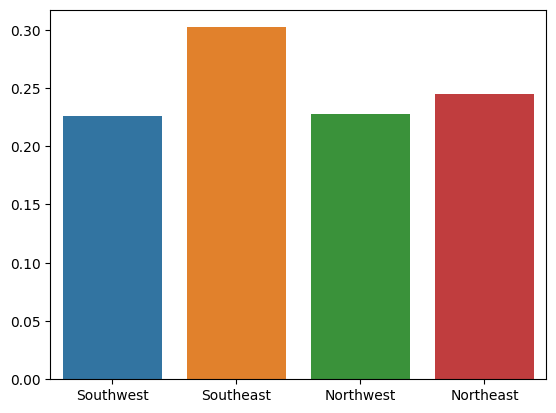

In [98]:
# 2. Distribusi peluang tagihan di tiap-tiap region
southwest = data_asuransi[data_asuransi['region'] == 'southwest']
southeast = data_asuransi[data_asuransi['region'] == 'southeast']
northwest = data_asuransi[data_asuransi['region'] == 'northwest']
northeast = data_asuransi[data_asuransi['region'] == 'northeast']

sum_all_charges = data_asuransi['charges'].sum()

southwest_prob = southwest['charges'].sum() / sum_all_charges # 0.2
southeast_prob = southeast['charges'].sum() / sum_all_charges # 0.3
northwest_prob = northwest['charges'].sum() / sum_all_charges # 0.2
northeast_prob = northeast['charges'].sum() / sum_all_charges # 0.2

all_region_prob = pd.DataFrame(np.array([[southwest_prob,southeast_prob,northwest_prob,northeast_prob]]))
all_region_prob.columns = ['Southwest','Southeast','Northwest','Northeast']
sns.barplot(data=all_region_prob)

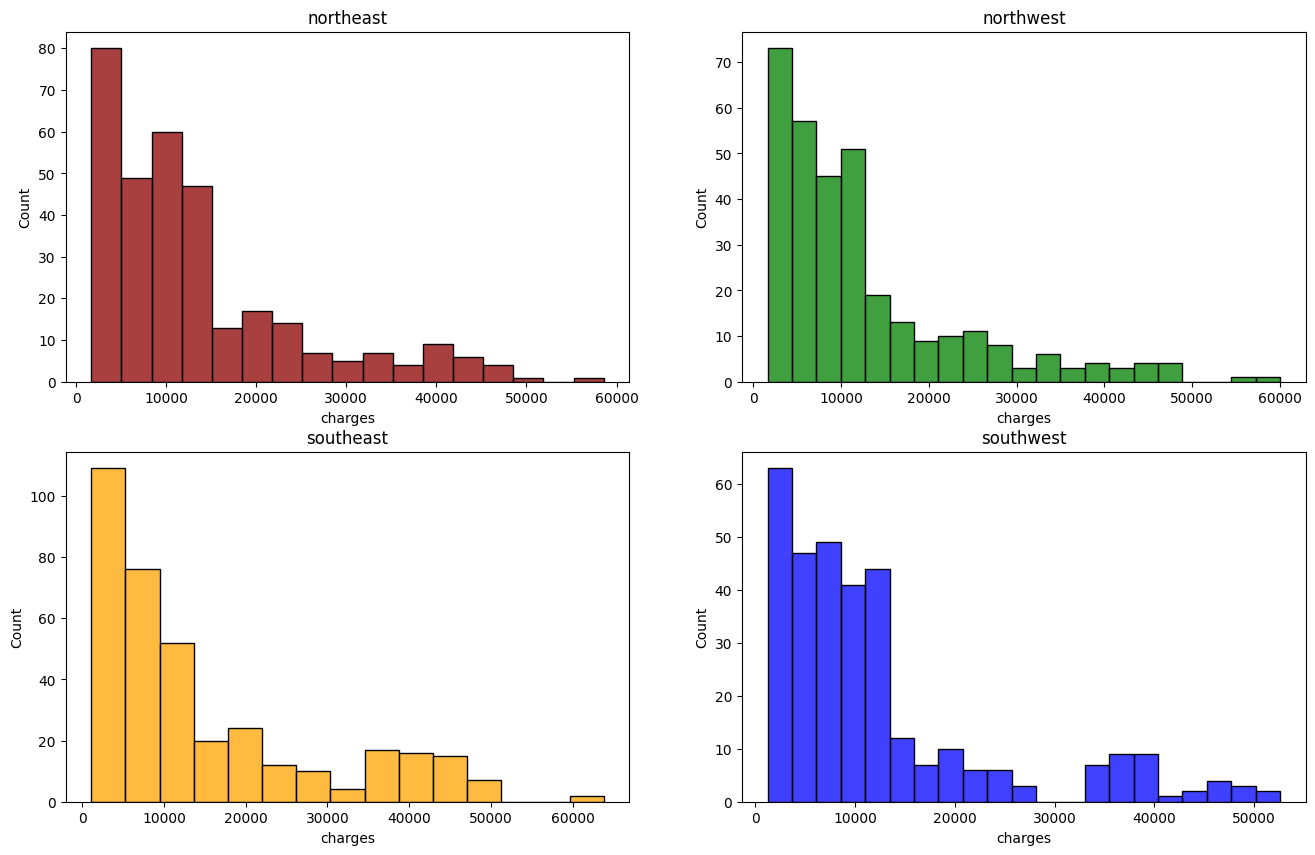

In [99]:
# Distribusi
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
ax = axes.ravel()

sns.histplot(data=northeast, x='charges', ax=ax[0], legend=True, color='darkred').set(title='northeast');
sns.histplot(data=northwest, x='charges', ax=ax[1], legend=True, color='green').set(title='northwest');
sns.histplot(data=southeast, x='charges', ax=ax[2], legend=True, color='orange').set(title='southeast');
sns.histplot(data=southwest, x='charges', ax=ax[3], legend=True, color='blue').set(title='southwest');

[Text(0, 0, '325'), Text(0, 0, '364'), Text(0, 0, '325'), Text(0, 0, '324')]

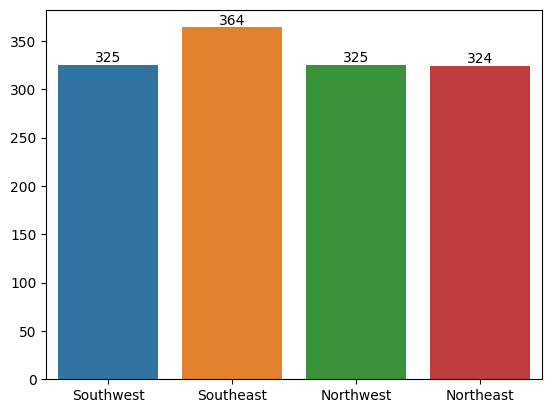

In [100]:
# 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
len_southwest = len(southwest)
len_southeast = len(southeast)
len_northwest = len(northwest)
len_northeast = len(northeast)

a = pd.DataFrame(np.array([[len_southwest,len_southeast,len_northwest,len_northeast]]))
a.columns = ['Southwest','Southeast','Northwest','Northeast']
ax = sns.barplot(data=a)

ax.bar_label(ax.containers[0])

In [101]:
# 4. Mana yang lebih tinggi proporsi perokok atau non perokok?
total_smoker = len(data_smoker)
total_nonsmoker = len(data_nonsmoker)
print(f'Jumlah smoker adalah {total_smoker} dan jumlah non smoker adalah {total_nonsmoker}. Sehingga total non-smoker lebih banyak jumlahnya')

Jumlah smoker adalah 274 dan jumlah non smoker adalah 1064. Sehingga total non-smoker lebih banyak jumlahnya


In [103]:
# 5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
len(data_smoker[data_smoker['sex'] == 'female']) / len(data_smoker)

0.4197080291970803

In [104]:
# 6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
len(data_smoker[data_smoker['sex'] == 'male']) / len(data_smoker)

0.5802919708029197

<AxesSubplot:xlabel='bmi', ylabel='charges'>

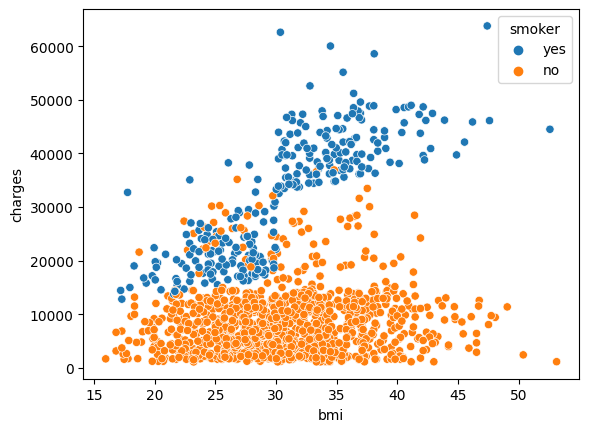

In [106]:
sns.scatterplot(data=data_asuransi, x='bmi', y='charges',hue = 'smoker')

/var/folders/1t/8qrjy_l91msg5bslbmh7qdp40000gn/T/ipykernel_918/2583515024.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(southwest_charges, shade=True, color="r", label='Southwest')
/var/folders/1t/8qrjy_l91msg5bslbmh7qdp40000gn/T/ipykernel_918/2583515024.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(southeast_charges, shade=True, color="b", label='Southeast')
/var/folders/1t/8qrjy_l91msg5bslbmh7qdp40000gn/T/ipykernel_918/2583515024.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(northwest_charges, shade=True, color="g", label='Northwest')
/var/folders/1t/8qrjy_l91msg5bslbmh7qdp40000gn/T

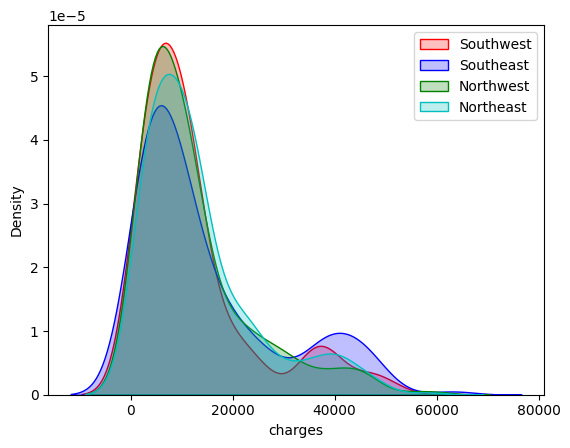

In [107]:
# 7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?
# histogram setiap region 
southwest_charges = southwest['charges']
southeast_charges = southeast['charges']
northwest_charges = northwest['charges']
northeast_charges = northeast['charges']

fig = sns.kdeplot(southwest_charges, shade=True, color="r", label='Southwest')
fig = sns.kdeplot(southeast_charges, shade=True, color="b", label='Southeast')
fig = sns.kdeplot(northwest_charges, shade=True, color="g", label='Northwest')
fig = sns.kdeplot(northeast_charges, shade=True, color="c", label='Northeast')
plt.legend()

Langkah #3 - Analisa Variabel Kontinu (CFD)

Variabel dalam data yang kita punya tidak semuanya berbentuk kategorik, untuk memahami kemungkinan kondisi variabel bernilai kontinu terhadap tagihan kesehatan, kita bisa melakukan analisa CDF pada data. Beberapa hal yang dapat Anda jawab adalah

In [108]:
# 1. Mencari peluang besar tagihan berdasarkan BMI

# BMI < 18.5, underweight range.
# 18.5 < BMI < 24.9, Healthy Weight range.
# 25.0 < BMI < 29.9, overweight range.
# BMI > 30.0 or higher, obese range.

underweight = data_asuransi[(data_asuransi['bmi'] <= 18.5)]
healthy = data_asuransi.loc[(data_asuransi['bmi'] >= 18.5) & (data_asuransi['bmi'] <= 24.9)]
overweight = data_asuransi.loc[(data_asuransi['bmi'] >= 25.0) & (data_asuransi['bmi'] <= 29.9)]
obese = data_asuransi[(data_asuransi['bmi'] >= 30.0)]

peluang_underweight = underweight['charges'].sum()/data_asuransi['charges'].sum()
peluang_healthy = healthy['charges'].sum()/data_asuransi['charges'].sum()
peluang_overweight = overweight['charges'].sum()/data_asuransi['charges'].sum()
peluang_obese = obese['charges'].sum()/data_asuransi['charges'].sum()

print(f'Peluang besar tagihan Underweight adalah {peluang_underweight:.2f}, untuk Healthy adalah {peluang_healthy:.2f}, untuk Overweight adalah {peluang_overweight:.2f}, untuk Obese adalah {peluang_obese:.2f}')

Peluang besar tagihan Underweight adalah 0.01, untuk Healthy adalah 0.13, untuk Overweight adalah 0.23, untuk Obese adalah 0.62


In [109]:
# 2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700
special_person = data_asuransi.loc[(data_asuransi['smoker'] == 'yes') & (data_asuransi['bmi'] >= 25)]
charges_167 = data_asuransi[(data_asuransi['charges'] >= 16700)]

peluang_special = len(special_person)/len(data_asuransi)
peluang_charge_167 = len(charges_167)/len(data_asuransi)

both = len(data_asuransi.loc[(data_asuransi['smoker'] == 'yes') & (data_asuransi['bmi'] >= 25) & (data_asuransi['charges'] >= 16700)]) / len(data_asuransi)

# A | B = P(A & B)/P(B)
both/peluang_special

0.9817351598173517

In [110]:
# 3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok
case1 = len(data_smoker[data_smoker['charges'] >= 16700])
case1/len(data_smoker)

0.927007299270073

In [111]:
# Mana yang lebih mungkin terjadi
# a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
# b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

bmi_25 = data_asuransi[data_asuransi['bmi'] > 25]
bmi_and_charges = bmi_25[bmi_25['charges'] >= 16700]
peluang_bmi_25 = len(bmi_and_charges)/len(bmi_25)

bmi_bawah_25 = data_asuransi[data_asuransi['bmi'] < 25]
bmi_bawah_charges = bmi_bawah_25[bmi_bawah_25['charges'] >= 16700]
peluang_bmi_bawah = len(bmi_bawah_charges)/len(bmi_bawah_25)

print(f'Peluang seseorang dengan BMI > 25 dan tagihan diatas 16.7k adalah {peluang_bmi_25:.2f}, sedangkan peluang BMI < 25 dan tagihan diatas 16.7k adalah {peluang_bmi_bawah:.2f}')

Peluang seseorang dengan BMI > 25 dan tagihan diatas 16.7k adalah 0.26, sedangkan peluang BMI < 25 dan tagihan diatas 16.7k adalah 0.21


In [112]:
# Mana yang lebih mungkin terjadi
# a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
# b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

bmi_25_smoker = data_smoker[data_smoker['bmi'] > 25]
bmi_smoker_and_charges = bmi_25_smoker[bmi_25_smoker['charges'] >= 16700]
peluang_bmi_smoker_and_charges = len(bmi_smoker_and_charges)/len(bmi_25_smoker)

bmi_bawah_25_non = data_nonsmoker[data_nonsmoker['bmi'] > 25]
bmi_bawah_non_charges = bmi_bawah_25_non[bmi_bawah_25_non['charges'] >= 16700]
peluang_bmi_bawah_non = len(bmi_bawah_non_charges)/len(bmi_bawah_25_non)

print(f'Peluang seseorang dengan BMI > 25, smoker, dan tagihan diatas 16.7k adalah {peluang_bmi_smoker_and_charges:.2f}, sedangkan peluang BMI > 25, nonsmoker, dan tagihan diatas 16.7k adalah {peluang_bmi_bawah_non:.2f}')

Peluang seseorang dengan BMI > 25, smoker, dan tagihan diatas 16.7k adalah 0.98, sedangkan peluang BMI > 25, nonsmoker, dan tagihan diatas 16.7k adalah 0.08


### 4 - Analisa Korelasi Variable

Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini.

In [113]:
def heatmap_correlation(corr):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

In [114]:
data_asuransi.corr(method='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [115]:
data_asuransi[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [116]:
data_smoker[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [117]:
data_nonsmoker[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.084037
charges,0.084037,1.000000


In [118]:
np.var(data_asuransi[['bmi', 'charges']], ddof=1)

bmi        3.718788e+01
charges    1.466524e+08
dtype: float64

In [119]:
data_encoded = data_asuransi
data_encoded['smoker'] = data_asuransi['smoker'].astype('category').cat.codes

In [120]:
# northwest, southeast, southwest, northeast
data_encoded['region'] = data_asuransi['region'].astype('category').cat.codes

In [121]:
# 0 female, 1 male
data_encoded['sex'] = data_asuransi['sex'].astype('category').cat.codes

In [122]:
data_asuransi.corr(method='pearson')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


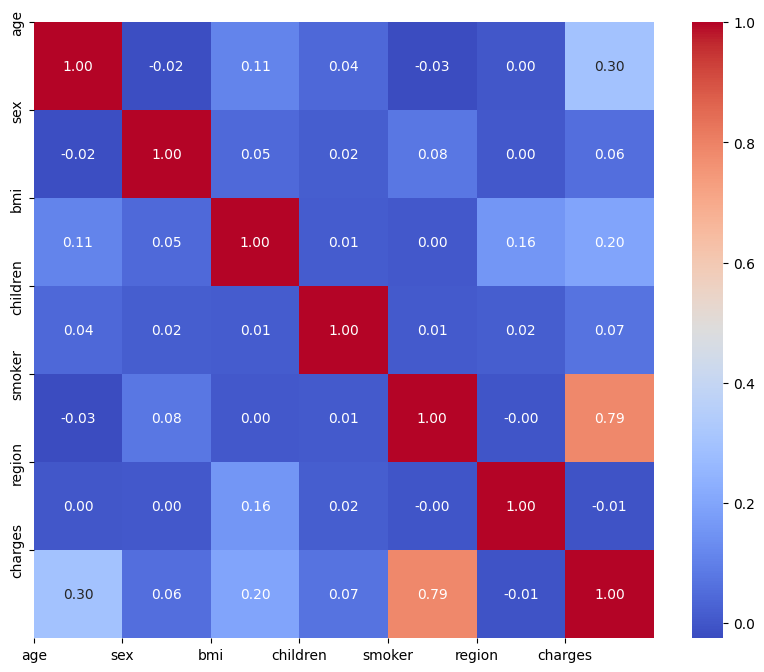

In [73]:
heatmap_correlation(data_encoded.corr(method='pearson'))

### 5 - Pengujian Hipotesis

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25
3. Proporsi perokok berbeda di tiap region

In [74]:
data_asuransi['charges'].mean()

13270.422265141257

In [75]:
# Menghitung mean sample dengan jumlah sampel 10 
data_asuransi.charges.sample(n=100).mean()

13844.447719999998

In [76]:
#menghitung error yang akan dihasilkan untuk setiap ukuran sampel
#inisialisasi list kosong terlebih dahulu
error = []
for i in range(1,len(data_asuransi)):
    #menghitung mean populasi
    mean_populasi = data_asuransi.charges.mean()
    #menghitung mean sample dengan jumlah sampel 1 hingga jumlah sampel=jumlah populasi 
    mean_sampel = data_asuransi.charges.sample(n=i).mean()
    #menghitung error dari mean sample
    rel_error = 100* abs(mean_populasi-mean_sampel)/mean_populasi
    error.append(rel_error)

In [77]:
# list of int
ukuran_sampel = list(range(1,1700))

# Calling DataFrame constructor after zipping
# both lists, with columns specified
errors = pd.DataFrame(list(zip(ukuran_sampel, error)),
               columns =['sample_size', 'relative_error'])
#menampilkan tabel errorrs
errors

,sample_size,relative_error
0,1,45.672476
1,2,13.278829
2,3,51.743979
3,4,17.822852
4,5,21.302479
...,...,...
1332,1333,0.008218
1333,1334,0.094447
1334,1335,0.121576
1335,1336,0.069484


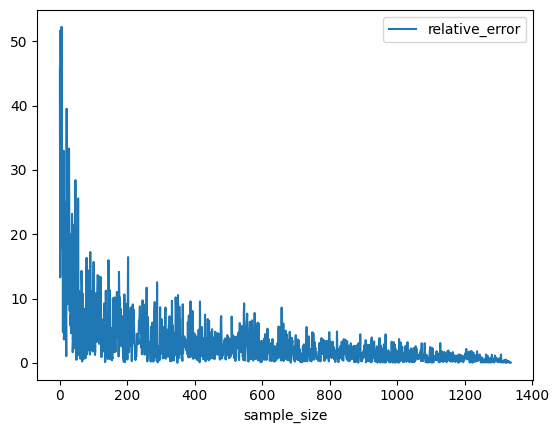

In [78]:
#Mencoba untuk menvisualisasikan hubungan antara relative error vs ukuran sampel
errors.plot(x='sample_size',y='relative_error',kind='line')
plt.show()

In [79]:
data_asuransi.std()

age            14.049960
sex             0.500160
bmi             6.098187
children        1.205493
smoker          0.403694
region          1.104885
charges     12110.011237
dtype: float64

In [80]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
smoker_charges = data_smoker['charges'].mean()
nonsmoker_charges = data_nonsmoker['charges'].mean()

print(f'Rata-rata tagihan smoker adalah {smoker_charges:.2f} dan rata-rata tagihan non smoker adalah {nonsmoker_charges:.2f}. Sehingga tagihan yang lebih besar adalah smoker')

Rata-rata tagihan smoker adalah 32050.23 dan rata-rata tagihan non smoker adalah 8434.27. Sehingga tagihan yang lebih besar adalah smoker


In [81]:
#import package
from statsmodels.stats.proportion import proportions_ztest

In [82]:
sample_nonsmoker = data_nonsmoker.charges.sample(n=200)
sample_smoker = data_smoker.charges.sample(n=200)

In [83]:
alpha = 0.05

In [84]:
np.var(sample_smoker), np.var(sample_nonsmoker)

(140136957.9891988, 36596734.51234379)

In [114]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = sample_smoker, b = sample_nonsmoker, equal_var=False, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 24.7585, p-value = 1.0000


In [106]:
# Pengambilan Keputusan
if p < alpha:
    print('H0 reject') 
else:
    print('H0 accepted')

H0 accepted


In [87]:
# 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
sample_highbmi = bmi_25.charges.sample(n=200)
sample_lowbmi = bmi_bawah_25.charges.sample(n=200)

In [88]:
np.var(sample_highbmi), np.var(sample_lowbmi)

(178749140.8698218, 58401227.283549815)

In [116]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = sample_highbmi, b = sample_lowbmi, equal_var=False, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 3.4951, p-value = 0.9997


In [108]:
# Pengambilan Keputusan
if p < alpha:
    print('H0 reject') 
else:
    print('H0 accepted')

H0 accepted


In [95]:
# 3. Tagihan kesehatan laki-laki lebih besar dari perempuan
data_female = data_asuransi[data_asuransi['sex'] == 0]
data_male = data_asuransi[data_asuransi['sex'] == 1]

In [96]:
sample_female = data_female.charges.sample(n=500)
sample_male = data_male.charges.sample(n=500)

In [97]:
np.var(sample_male), np.var(sample_female)

(165559369.210136, 133332082.04188865)

In [117]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = sample_male, b = sample_female, equal_var=False, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 1.4372, p-value = 0.9245


In [110]:
# Pengambilan Keputusan
if p < alpha:
    print('H0 reject') 
else:
    print('H0 accepted')

H0 accepted


In [101]:
# BMI laki-laki dan perempuan sama
sample_bmi_male = data_male.bmi.sample(n=500)
sample_bmi_female = data_male.bmi.sample(n=500)

In [102]:
np.var(sample_male), np.var(sample_female)

(165559369.210136, 133332082.04188865)

In [118]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = sample_bmi_male, b = sample_bmi_female, equal_var=False, alternative='two-sided') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 0.4145, p-value = 0.6786
